In [29]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [30]:
mean1 = [0,0]
cov1 = [[1,0],[0,1]]
P_set1 = np.random.multivariate_normal(mean1,cov1,300)
lable_A = np.array(['A']*300)

In [31]:
mean2 = [1,2]
cov2 = [[1,0],[0,2]]
P_set2 = np.random.multivariate_normal(mean2,cov2,200)
lable_B = np.array(['B']*200)

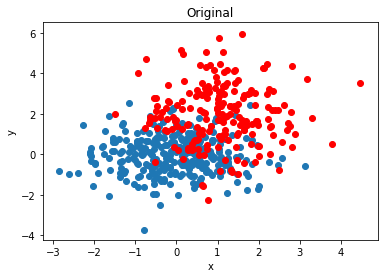

In [32]:
x1,y1 = P_set1.T
x2,y2 = P_set2.T
plt.axis()
plt.title("Original")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,y1)
plt.scatter(x2,y2,c = 'r')

In [33]:
TrainP_set = np.append(P_set1,P_set2,axis=0)
Train_lable = np.append(lable_A,lable_B)
'''
print(TrainP_set.shape)
print(Train_lable.shape)
'''

'\nprint(TrainP_set.shape)\nprint(Train_lable.shape)\n'

In [34]:
'''
permutation = np.random.permutation(Train_lable.shape[0])#获取打乱后的行号
TestP_set = TrainP_set[permutation, :] 
Test_lable = Train_lable[permutation] #根据打乱后的行号打乱点集和对应标签
print(TestP_set[0])
#print(Test_lable)
'''

'\npermutation = np.random.permutation(Train_lable.shape[0])#获取打乱后的行号\nTestP_set = TrainP_set[permutation, :] \nTest_lable = Train_lable[permutation] #根据打乱后的行号打乱点集和对应标签\nprint(TestP_set[0])\n#print(Test_lable)\n'

下面进行KNN分类

In [48]:
Sort_lable = []  #分类后的标签初始化
k = 4   #标定k值
for i in range(500):
    x,y = TrainP_set[i]
    length = []
    np.array(length)
    for j in range(500):
        m = (x-TrainP_set[j][0])**2
        n = (y-TrainP_set[j][1])**2
        length = np.append(length,m+n)
    index = np.argsort(length)  #获取排序后的索引
    top_lable = [Train_lable[i] for i in index[:k]] #获取前k个最近邻点的标签
    predict_lable = Counter(top_lable).most_common(1)[0][0]  #找出出现最多的点的标签
    Sort_lable = np.append(Sort_lable,predict_lable)
#print(Sort_lable)
#计算分类准确率
error = 0
for i in range(500):
    if Sort_lable[i] != 'A' and i<300:
        error += 1
    elif Sort_lable[i] != 'B' and i>300:
        error += 1
correct_rate = 1 - (error/500)
print('分类准确率为：',correct_rate)

分类准确率为： 0.94


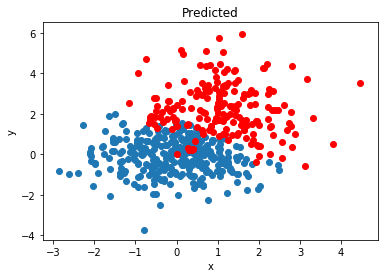

In [36]:
Pd_A = np.array([[0,0]]) #分类后的A点集合
Pd_B = np.array([[0,0]]) #分类后的B点集合
for i  in range(500):
    if Sort_lable[i] == 'A':
        Pd_A = np.append(Pd_A,[TrainP_set[i]],axis=0)
    elif Sort_lable[i] == 'B':
        Pd_B = np.append(Pd_B,[TrainP_set[i]],axis=0)
#print(Pd_A)
#print(Pd_B)
x1,y1 = Pd_A.T
x2,y2 = Pd_B.T
plt.axis()
plt.title("Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,y1)
plt.scatter(x2,y2,c = 'r')
